In [1]:

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from torchsummary import summary
import numpy as np
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv("C:/Users/min22/Desktop/Artifical intelligence/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [15]:

# Outcome 컬럼 삭제
X = df.drop('Outcome',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [17]:

# BMI를 레이블로 설정
y = df['BMI']
y.head()

0    33.6
1    26.6
2    23.3
3    28.1
4    43.1
Name: BMI, dtype: float64

In [19]:

y = y.values

In [21]:

X = X.values

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [27]:

import torch

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [29]:

from torch.utils.data import TensorDataset, DataLoader

# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([614, 8]),
 torch.Size([154, 8]),
 torch.Size([614]),
 torch.Size([154]))

In [33]:
import torch.nn as nn
import torch.optim as optim

class CarEvaluationDense(nn.Module):
    def __init__(self):
        super(CarEvaluationDense, self).__init__()
        self.fc1 = nn.Linear(8, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1) # 회귀이므로 출력은 1
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer
model = CarEvaluationDense()

In [35]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [37]:
# Variables to store loss and accuracy
train_losses = []
test_losses = []

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels.float()) 

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate average loss over an epoch
    train_losses.append(running_loss / len(train_dataloader))

    # Evaluate on test data
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels.float())
            test_loss += loss.item()

    avg_test_loss = test_loss / len(test_dataloader)
    test_losses.append(avg_test_loss)

    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Test Loss: {avg_test_loss:.4f}")

print("Training complete.")

Epoch 1/20, Train Loss: 969.0901, Test Loss: 108.1019
Epoch 2/20, Train Loss: 107.8828, Test Loss: 62.9129
Epoch 3/20, Train Loss: 55.8522, Test Loss: 49.0952
Epoch 4/20, Train Loss: 48.4566, Test Loss: 46.6554
Epoch 5/20, Train Loss: 47.4061, Test Loss: 42.5876
Epoch 6/20, Train Loss: 36.6175, Test Loss: 38.1292
Epoch 7/20, Train Loss: 32.2914, Test Loss: 33.2526
Epoch 8/20, Train Loss: 27.5630, Test Loss: 28.1761
Epoch 9/20, Train Loss: 21.8926, Test Loss: 23.4696
Epoch 10/20, Train Loss: 17.1544, Test Loss: 17.6921
Epoch 11/20, Train Loss: 13.0186, Test Loss: 13.1307
Epoch 12/20, Train Loss: 9.5709, Test Loss: 9.7318
Epoch 13/20, Train Loss: 6.1891, Test Loss: 5.5490
Epoch 14/20, Train Loss: 3.9554, Test Loss: 3.8475
Epoch 15/20, Train Loss: 2.5350, Test Loss: 2.6435
Epoch 16/20, Train Loss: 2.1065, Test Loss: 2.0753
Epoch 17/20, Train Loss: 1.6327, Test Loss: 1.3711
Epoch 18/20, Train Loss: 1.1803, Test Loss: 1.2095
Epoch 19/20, Train Loss: 1.0892, Test Loss: 1.0050
Epoch 20/20, Tr

In [39]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Evaluation
model.eval()
all_labels = []
all_predictions = []

with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(outputs.squeeze().cpu().numpy())

# Convert to numpy arrays
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

# Calculate MSE
mse = mean_squared_error(all_labels, all_predictions)

print(f'MSE: {mse:.4f}')

MSE: 0.8555


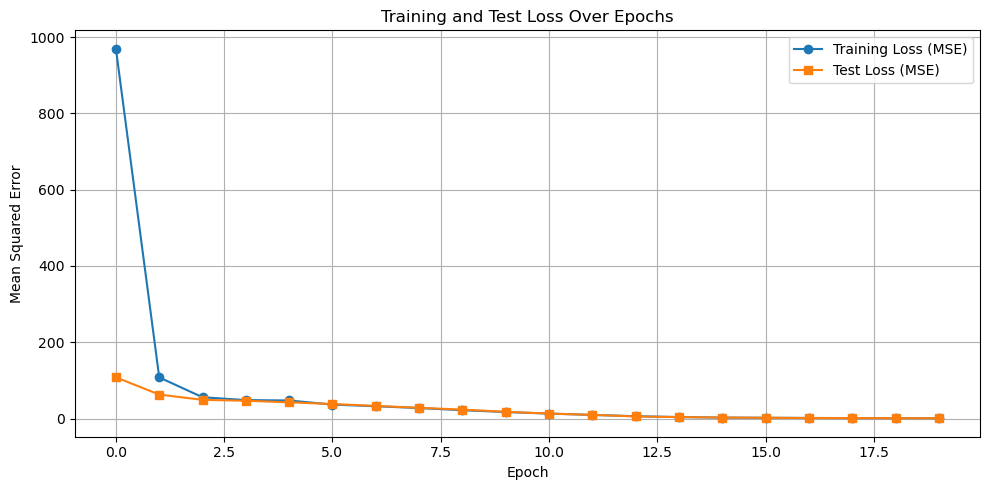

In [41]:
import matplotlib.pyplot as plt

# Plot the training and test loss (MSE)
plt.figure(figsize=(10, 5))

plt.plot(train_losses, label='Training Loss (MSE)', marker='o')
plt.plot(test_losses, label='Test Loss (MSE)', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training and Test Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()